dependencies; gym, matplotlib

In [1]:
from soft_actor_critic import SoftActorCritic 
from utils import NormalizedActions
from utils import plot

import gym
import matplotlib.pyplot as plt
from matplotlib import animation

from IPython.display import display
from IPython.display import clear_output

%matplotlib inline

In [2]:
#env = gym.make("Pendulum-v0")#
env = NormalizedActions(gym.make("Pendulum-v0"))
action_dim = env.action_space.shape[0]
state_dim  = env.observation_space.shape[0]
sac = SoftActorCritic(action_dim, state_dim)

In [3]:
max_frames  = 40000
max_steps   = 500
frame_idx   = 0
rewards     = []
batch_size  = 128

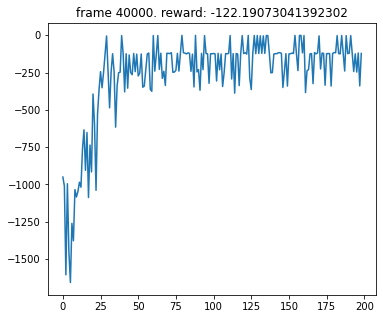

In [4]:
while frame_idx < max_frames:
    state = env.reset()
    episode_reward = 0
    
    for step in range(max_steps):
        if frame_idx >1000:
            action = sac.act(state).detach()
            next_state, reward, done, _ = env.step(action.numpy())
        else:
            action = env.action_space.sample()
            next_state, reward, done, _ = env.step(action)
        
        sac.replay_buffer.push(state, action, reward, next_state, done)
        
        state = next_state
        episode_reward += reward
        frame_idx += 1
        
        if len(sac.replay_buffer) > batch_size:
            sac.update(batch_size)
        
        if frame_idx % 500 == 0:
            clear_output(True)
            plot(frame_idx, rewards)
        
        if done:
            break
        
    rewards.append(episode_reward)

In [5]:
env.close()